<a href="https://colab.research.google.com/github/bhattacharya5/BiologicalComputerVision/blob/main/Convolution_Assignment1_Amarnath_Bhattacharya_(M21AIE211).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import NumPy for array/matrix operations, and matplotlib.pyplot for plotting/drwing image
import numpy as np
import matplotlib.pyplot as plt

#Magic command to execute multiple instructions on single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print( "Environment set")

Environment set


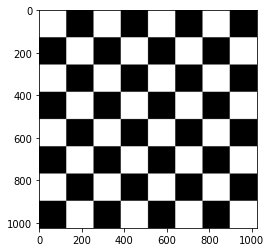

In [3]:
# Create a chess-board image

height=1024 # Image dimensions
width =1024

chessboard = np.zeros((height, width), dtype=np.uint8) # Initialize with zeroes (black)


for i in range(0,height):
  for j in range(0, width):
      if(((i%256 < 128 ) and (j%256 < 128)) or ((i%256 >= 128 ) and (j%256 >= 128))) :
        chessboard[i,j] = 255   # Make it white

# Show the image
fig = plt.figure() # use default display size
plt.imshow(chessboard, cmap="gray")



In [4]:
chessboard[1]
print()

num_rows, num_cols = chessboard.shape
print (num_rows, num_cols)

array([255, 255, 255, ...,   0,   0,   0], dtype=uint8)


1024 1024


In [7]:
# Define horizontal and vertical Sobel filters

filter_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # You need to fill in the array
filter_v = np.array([[-1, -2, -1],[ 0,  0,  0],[ 1,  2,  1]])  # You need to fill in the array

print("filter_h = ", filter_h)
print("filter_v = ", filter_v)

filter_h =  [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
filter_v =  [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [8]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

In [9]:
# define 2D convolution function
def my2Dconvolution(img: np.array, kernel: np.array):
  # You need to write your own convolution code
  # Do not use any library
  # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img


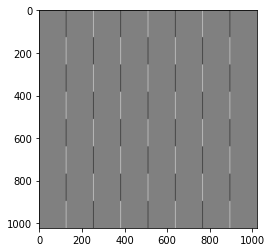

In [10]:
# Use your own convolution function -- do not use any library function
# Convolve with filter_h

conv_image_h = my2Dconvolution(kernel=filter_h, img=chessboard)

# Show convoluted image
fig = plt.figure() # use default display size
plt.imshow(conv_image_h, cmap="gray")

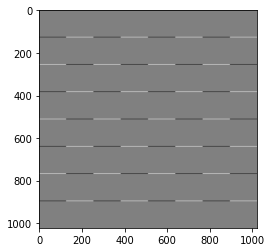

In [12]:
# Use your own convolution function -- do not use any library function
# Convolve with filter_v

conv_image_v = my2Dconvolution(kernel=filter_v, img=chessboard)

# Show convoluted image
fig = plt.figure() # use default display size
plt.imshow(conv_image_v, cmap="gray")